## If fetching file from google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp '/content/gdrive/My Drive/yolo_object_detection.zip' .
!cp '/content/gdrive/My Drive/yolov3.weights' .

In [3]:
!unzip yolo_object_detection.zip
!mv yolo_object_detection/* .

Archive:  yolo_object_detection.zip
   creating: yolo_object_detection/
  inflating: yolo_object_detection/room_ser.jpg  
  inflating: yolo_object_detection/yolo_object_detection.py  
  inflating: yolo_object_detection/coco.names  
  inflating: yolo_object_detection/yolov3.cfg  


## If downloading file to google colab


In [0]:
!wget https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
!unzip yolo_object_detection.zip
!mv yolo_object_detection/* 

## Imports

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Load files

In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()] # name of all the classes in the dataset
layer_names = net.getLayerNames() # all the layers in the yolov3
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()] # the three output layers of yolov3
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Load an image

In [0]:
# Loading image
img = cv2.imread('image.jpg')
img = cv2.resize(img, None, fx=0.2, fy=0.2)
height, width, channels = img.shape

## Feeding image to network 

In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [0]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

## Apply Non-Maximum Suppression
##### To remove the noise from the output of the model, when many bounding boxes have the same object.

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Result

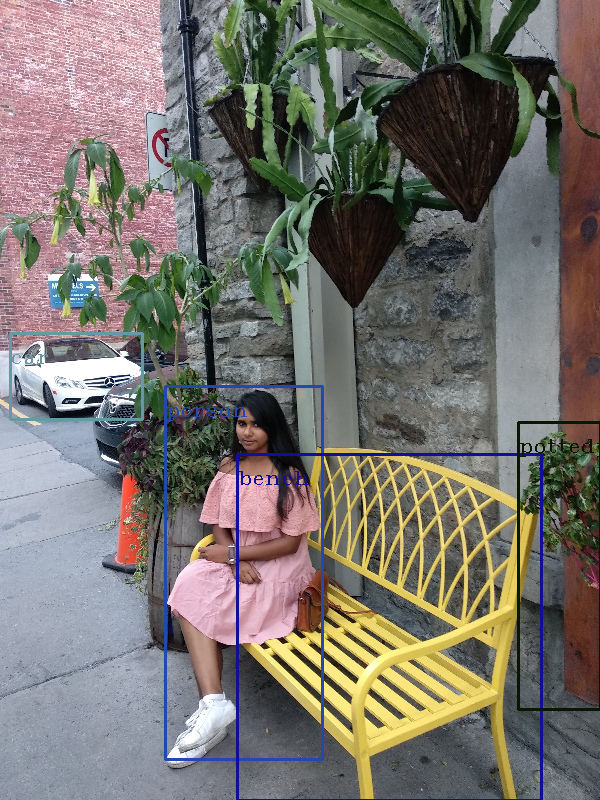

In [7]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 1, color, 1)
cv2_imshow(img)
cv2.imwrite('image_yolov3.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()